# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Untuk Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Data Preperation

## Data Loading

In [ ]:
import kagglehub
import pandas as pd
import os

# Download dataset
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Dataset downloaded to:", path)

# Cari file CSV di folder hasil download
for file in os.listdir(path):
    print(file)

Using Colab cache for faster access to the 'online-retail-ii-uci' dataset.
Dataset downloaded to: /kaggle/input/online-retail-ii-uci
online_retail_II.csv


## Data Preprocessing

In [ ]:
# Load Dataset
df = pd.read_csv(os.path.join(path, "online_retail_II.csv"))
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [ ]:
# Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
# Check Jumlah Rows dan Columns
print(f"Jumlah Rows: {df.shape[0]}")
print(f"Jumlah Columns: {df.shape[1]}")

Jumlah Rows: 1067371
Jumlah Columns: 8


In [ ]:
# Convert Customer ID menjadi String (Nominal Categorical)
df["Customer ID"] = df["Customer ID"].astype('Int64').astype('string')

In [ ]:
# Convert InvoiceDate menjadi Datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [ ]:
# Check Informasi Dataset setelah dirubah
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,string[python]
Country,object


In [ ]:
# Check Missing Values
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [ ]:
# Drop Rows dengan Missinng Value di Customer ID
df.dropna(subset=["Customer ID"], inplace=True)

In [ ]:
# Check Missing Value setalh Menghapus Missing Value di Customer ID
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [ ]:
# Check Jumlah Row Setelah Menghapus Missing Value
print(f"Jumlah Rows Setelah Drop Missing Value: {df.shape[0]}")

Jumlah Rows Setelah Drop Missing Value: 824364


In [ ]:
# Menghitung Unique Value di setiap Kolom
unique_counts = df.nunique().sort_values(ascending=True)
print(unique_counts)

Country           41
Quantity         643
Price           1022
StockCode       4646
Description     5299
Customer ID     5942
InvoiceDate    41439
Invoice        44876
dtype: int64


/tmp/ipython-input-235935569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


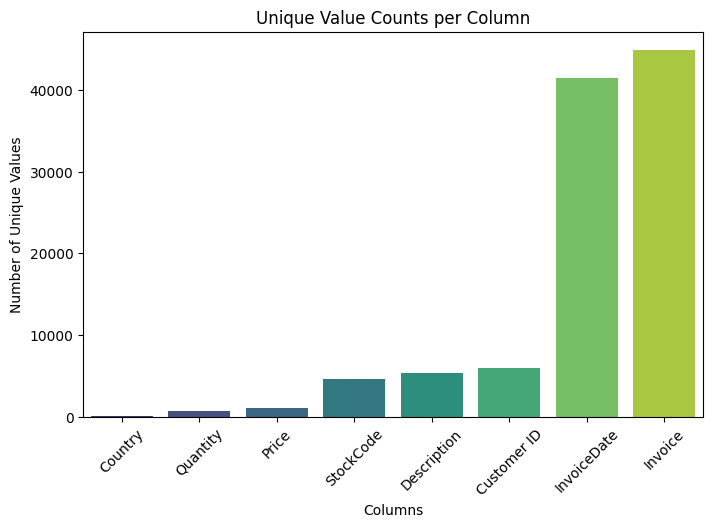

In [ ]:
# Plot Unique Value per Kolom
plt.figure(figsize=(8,5))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")

plt.title("Unique Value Counts per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check Basic Statistics
df[['Quantity', 'Price']].describe()
df.describe(include=[np.number])

,Quantity,Price
count,824364.000000,824364.000000
mean,12.414574,3.676800
std,188.976099,70.241388
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


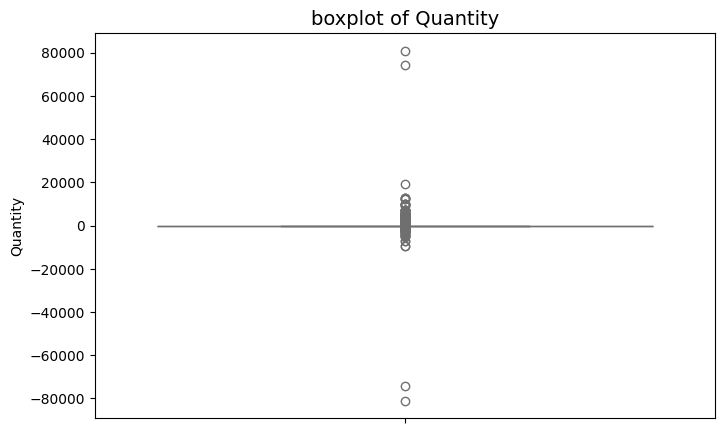

In [ ]:
# Outliers Quantity
plt.figure(figsize=(8,5))
sns.boxplot(df['Quantity'], color="skyblue")
plt.title("boxplot of Quantity", fontsize=14)
plt.ylabel("Quantity")
plt.show()

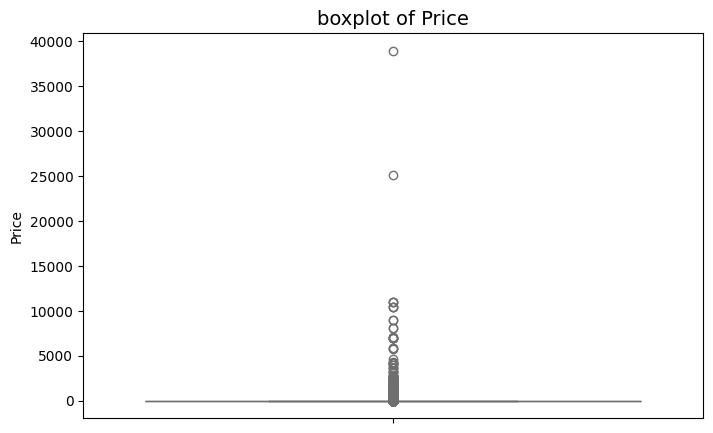

In [ ]:
# Outliers Price
plt.figure(figsize=(8,5))
sns.boxplot(df['Price'], color="skyblue")
plt.title("boxplot of Price", fontsize=14)
plt.ylabel("Price")
plt.show()

In [ ]:
# Mencari cancelled invoices
cancelled = df[df['Invoice'].str.startswith('C')]

# Cek banyak cancelled orders
print("Cancelled orders:", cancelled.shape[0])

# Quick look
cancelled.head()

Cancelled orders: 18744


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia


In [ ]:
# Remove cancelled invoices (those starting with 'C')
df = df[~df['Invoice'].str.startswith('C')]

# Reset index after removal
df = df.reset_index(drop=True)

print("Dataset after removing cancelled invoices:", df.shape)

Dataset after removing cancelled invoices: (805620, 8)


In [ ]:
# Cek nol atau negatif
zero_price = df[df["Price"] <= 0]
print(zero_price.shape)
zero_price.head()

(71, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3631,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126,United Kingdom
4754,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658,United Kingdom
12751,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231,United Kingdom
14138,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108,United Kingdom
14139,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108,United Kingdom


In [ ]:
# menghilangkan rpice 0 atau negatif
df = df[df["Price"] > 0]
print(f"The remaining number of rows after cleaning are:\n {df.shape[0]}")

The remaining number of rows after cleaning are:
 805549


In [ ]:
# Filtering StockCodes
wrong_stock_codes= df[df["StockCode"].astype(str).str.contains(r"^[a-zA-Z''-'\s]{1,40}$")]["StockCode"].unique().tolist()
df[df["StockCode"].isin(wrong_stock_codes)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST,32
BANK CHARGES,32
D,5
DOT,16
M,709
PADS,17
POST,1838


In [ ]:
df = df[~df["StockCode"].astype(str).str.contains(r"^[a-zA-Z''-'\s]{1,40}$", na=False)]
wrong_stock_codes2= df[df["StockCode"].astype(str).str.contains(r"[a-zA-Z]{3,}")]["StockCode"].unique().tolist()
df[df["StockCode"].isin(wrong_stock_codes2)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST2,3
TEST001,9
TEST002,1


In [ ]:
df = df[~df["StockCode"].astype(str).str.contains(r"[a-zA-Z]{3,}", na=False)]
print(f"The remaining number of rows after cleaning are:\n {df.shape[0]}")

The remaining number of rows after cleaning are:
 802887


In [ ]:
# Check for full-row duplicates
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])

Number of duplicate rows: 26060


In [ ]:
# To see all duplicates (both first and second occurrences)
duplicates1 = df[df.duplicated(keep=False)]
duplicates1.shape

(50712, 8)

In [ ]:
# rows before removing duplicates
print("Before removing duplicates:", df.shape)

# Remove duplicates
df = df.drop_duplicates()

# rows after removing duplicates
print("After removing duplicates:", df.shape)

Before removing duplicates: (802887, 8)
After removing duplicates: (776827, 8)


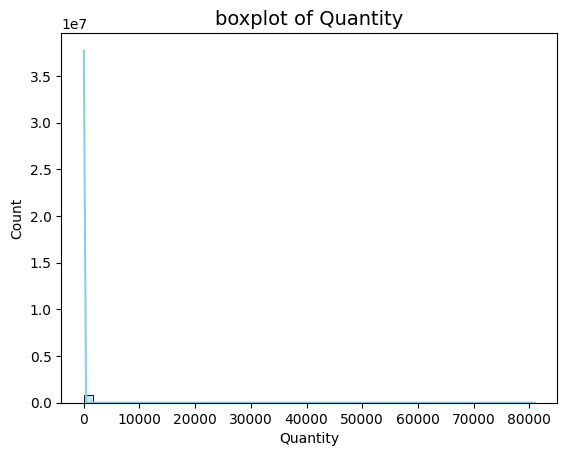

In [ ]:
# Distribusi Quantityplt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=50, kde=True, color="skyblue")
plt.title("boxplot of Quantity", fontsize=14)
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

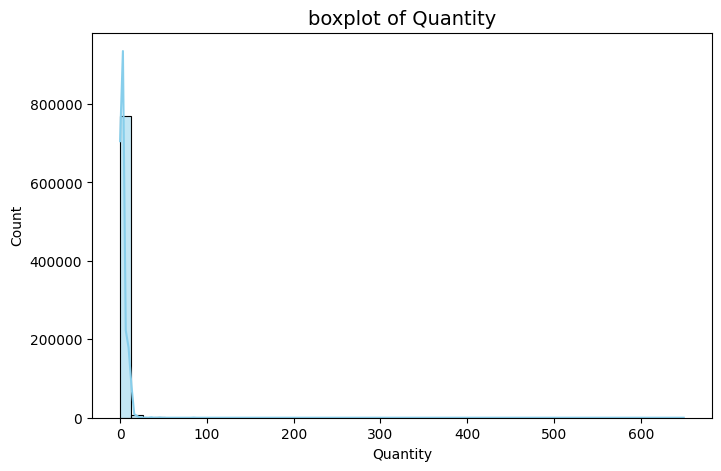

In [ ]:
# Distribusi Price
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True, color="skyblue")
plt.title("boxplot of Quantity", fontsize=14)
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

In [ ]:
print("Maximum Price per unit:", df['Price'].max())
print("Minimum Price per unit", df['Price'].min())
print("Maximum Quantity", df['Quantity'].max())
print("Minimum Quantity", df['Quantity'].min())

Maximum Price per unit: 649.5
Minimum Price per unit 0.03
Maximum Quantity 80995
Minimum Quantity 1


# RFM

In [ ]:
# Create a revenue column
df["Revenue"] = df["Quantity"] * df["Price"]

In [ ]:
# Pick reference date = day after last purchase
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

print("Dataset covers from:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())
print("Reference date for recency calculation:", reference_date)

Dataset covers from: 2009-12-01 07:45:00 to 2011-12-09 12:50:00
Reference date for recency calculation: 2011-12-10 12:50:00


In [ ]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference date:", reference_date)
df.shape

Reference date: 2011-12-10 12:50:00


(776827, 9)

## Menghitung RFM

In [ ]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'nunique',
    'Revenue': 'sum',
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Revenue': 'Monetary',
}, inplace=True)

rfm = rfm.reset_index()
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,326,3,77352.96
1,12347,2,8,4921.53
2,12348,75,5,1658.40
3,12349,19,3,3678.69
4,12350,310,1,294.40


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = rfm[['Recency', 'Frequency', 'Monetary']]
X_scaled = scaler.fit_transform(X)

In [ ]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,326,3,77352.96
1,12347,2,8,4921.53
2,12348,75,5,1658.40
3,12349,19,3,3678.69
4,12350,310,1,294.40


In [ ]:
X_scaled = pd.DataFrame(X_scaled,
                        columns=['Recency', 'Frequency', 'Monetary'],
                        index=rfm.index)

# Clustering

## Optimal k dengan elbow method

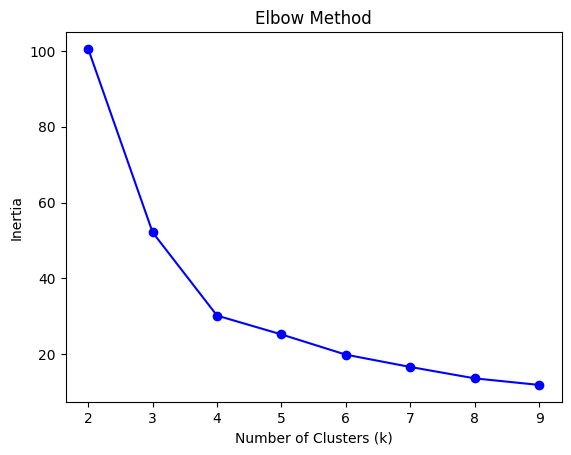

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("--- Evaluasi K-Means menggunakan Silhouette, DBI, dan CHI ---")
print("Catatan: Nilai K terbaik adalah yang memiliki Silhouette Score Tertinggi, DBI Terendah, dan CHI Tertinggi.")

for k in range(2, 10):
    # Inisialisasi model K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # Melatih model dan mendapatkan label
    labels = kmeans.fit_predict(X_scaled)

    # --- Metrik 1: Silhouette Score ---
    silhouette = silhouette_score(X_scaled, labels)

    # --- Metrik 2: Davies-Bouldin Index (DBI) ---
    # DBI: Semakin rendah nilainya, semakin baik (mendekati 0).
    dbi = davies_bouldin_score(X_scaled, labels)

    # --- Metrik 3: Calinski-Harabasz Index (CHI) ---
    # CHI: Semakin tinggi nilainya, semakin baik.
    chi = calinski_harabasz_score(X_scaled, labels)

    print(f"\n===== K = {k} =====")
    print(f"  Silhouette Score           = {silhouette:.4f}")
    print(f"  Davies-Bouldin Index (DBI) = {dbi:.4f}")
    print(f"  Calinski-Harabasz Index (CHI)  = {chi:.2f}")

--- Evaluasi K-Means menggunakan Silhouette, DBI, dan CHI ---
Catatan: Nilai K terbaik adalah yang memiliki Silhouette Score Tertinggi, DBI Terendah, dan CHI Tertinggi.

===== K = 2 =====
  Silhouette Score           = 0.7161
  Davies-Bouldin Index (DBI) = 0.4163
  Calinski-Harabasz Index (CHI)  = 21952.25

===== K = 3 =====
  Silhouette Score           = 0.6753
  Davies-Bouldin Index (DBI) = 0.4967
  Calinski-Harabasz Index (CHI)  = 23867.73

===== K = 4 =====
  Silhouette Score           = 0.6537
  Davies-Bouldin Index (DBI) = 0.4593
  Calinski-Harabasz Index (CHI)  = 28897.83

===== K = 5 =====
  Silhouette Score           = 0.6267
  Davies-Bouldin Index (DBI) = 0.5081
  Calinski-Harabasz Index (CHI)  = 26228.53

===== K = 6 =====
  Silhouette Score           = 0.5733
  Davies-Bouldin Index (DBI) = 0.5415
  Calinski-Harabasz Index (CHI)  = 26923.42

===== K = 7 =====
  Silhouette Score           = 0.5098
  Davies-Bouldin Index (DBI) = 0.5956
  Calinski-Harabasz Index (CHI)  = 26996.

In [ ]:
# --- Sintaks yang Anda berikan ---
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

# Asumsi 'rfm' adalah DataFrame RFM Anda dan X_scaled adalah data yang diskalakan
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

# 1. Hitung Jumlah Anggota (Pelanggan Unik) di setiap Cluster
cluster_counts = rfm['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Jumlah_Anggota']

# 2. Hitung Total Anggota
total_anggota = cluster_counts['Jumlah_Anggota'].sum()

# 3. Hitung Proporsi (Persentase)
cluster_counts['Proporsi (%)'] = (cluster_counts['Jumlah_Anggota'] / total_anggota) * 100

print("Proporsi Pembagian Anggota (Pelanggan Unik) per Cluster:")
print(cluster_counts)


Proporsi Pembagian Anggota (Pelanggan Unik) per Cluster:
   Cluster  Jumlah_Anggota  Proporsi (%)
0        1            3140     53.647702
1        0            1100     18.793781
2        2             988     16.880232
3        3             625     10.678285


In [ ]:
rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,412.570000,2.705455,965.076145
1,37.886624,9.222930,4547.705697
2,213.429150,3.698381,1365.206366
3,621.438400,1.616000,625.480288


In [ ]:
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_summary)

            Recency  Frequency     Monetary
Cluster                                    
0        412.570000   2.705455   965.076145
1         37.886624   9.222930  4547.705697
2        213.429150   3.698381  1365.206366
3        621.438400   1.616000   625.480288


In [ ]:
rfm['Cluster'] = kmeans.fit_predict(X_scaled)
rfm

,Customer ID,Recency,Frequency,Monetary,Cluster
0,12346,326,3,77352.96,0
1,12347,2,8,4921.53,1
2,12348,75,5,1658.40,1
3,12349,19,3,3678.69,1
4,12350,310,1,294.40,2
...,...,...,...,...,...
5848,18283,4,22,2658.95,1
5849,18284,432,1,461.68,0
5850,18285,661,1,427.00,3
5851,18286,477,2,1296.43,0


In [ ]:
# Pastikan Customer ID memiliki tipe data yang sama
df['Customer ID'] = df['Customer ID'].astype(float)
rfm['Customer ID'] = rfm['Customer ID'].astype(float)

# Merge dataset
df_full = df.merge(
    rfm,
    on='Customer ID',
    how='left'
)

df_full.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Recency,Frequency,Monetary,Cluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,158,8,2433.28,2
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,158,8,2433.28,2
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,158,8,2433.28,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,158,8,2433.28,2
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,158,8,2433.28,2


In [ ]:
df_full

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Recency,Frequency,Monetary,Cluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,158,8,2433.28,2
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,158,8,2433.28,2
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,158,8,2433.28,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,158,8,2433.28,2
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,158,8,2433.28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776822,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,1,4,790.81,1
776823,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,1,4,790.81,1
776824,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1,4,790.81,1
776825,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1,4,790.81,1


In [ ]:
df_full['Revenue'] = df_full['Quantity'] * df_full['Price']
df_full

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Recency,Frequency,Monetary,Cluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,158,8,2433.28,2
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,158,8,2433.28,2
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,158,8,2433.28,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,158,8,2433.28,2
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,158,8,2433.28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776822,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,1,4,790.81,1
776823,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,1,4,790.81,1
776824,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1,4,790.81,1
776825,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1,4,790.81,1


In [ ]:
df_full['InvoiceDate'] = pd.to_datetime(df_full['InvoiceDate'])
df_full['Date'] = df_full['InvoiceDate'].dt.date
df_full['YearMonth'] = df_full['InvoiceDate'].dt.to_period('M')
df_full

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Recency,Frequency,Monetary,Cluster,Date,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,158,8,2433.28,2,2009-12-01,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,158,8,2433.28,2,2009-12-01,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,158,8,2433.28,2,2009-12-01,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,158,8,2433.28,2,2009-12-01,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,158,8,2433.28,2,2009-12-01,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776822,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,1,4,790.81,1,2011-12-09,2011-12
776823,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,1,4,790.81,1,2011-12-09,2011-12
776824,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1,4,790.81,1,2011-12-09,2011-12
776825,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1,4,790.81,1,2011-12-09,2011-12


In [ ]:
cust_top = (
    df_full.groupby(['Customer ID', 'Description'])['Quantity']
    .sum()
    .reset_index()
    .sort_values(['Customer ID', 'Quantity'], ascending=[True, False])
)

# Ambil top 1 produk setiap customer (bisa buat rekomendasi kategori serupa)
cust_top1 = cust_top.groupby('Customer ID').head(1)

In [ ]:
topN_cluster = (
    df_full.groupby(['Cluster', 'Description'])['Quantity']
    .sum()
    .reset_index()
    .sort_values(['Cluster', 'Quantity'], ascending=[True, False])
)

topN_cluster = topN_cluster.groupby('Cluster').head(10)

In [ ]:
user_item_matrix = df_full.pivot_table(
    index='Customer ID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Hitung similarity antar produk
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=user_item_matrix.columns,
    columns=user_item_matrix.columns
)

In [ ]:
def recommend_products(customer_id, rfm, top_cluster_df, user_matrix, item_sim_df, n=5):

    # 1. Cek Customer ID di rfm
    if customer_id not in rfm['Customer ID'].values:
        return {"error": f"Customer {customer_id} tidak ditemukan."}

    # 2. Cek Customer punya transaksi
    if customer_id not in user_matrix.index:
        return {"error": f"Customer {customer_id} tidak memiliki transaksi."}

    # 3. Ambil cluster customer
    cluster = int(rfm.loc[rfm['Customer ID'] == customer_id, 'Cluster'].values[0])

    # 4. Ambil top produk dalam cluster (pakai Description)
    cluster_reco = (
        top_cluster_df[top_cluster_df['Cluster'] == cluster]['Description']
        .tolist()[:n]
    )

    # 5. Item yang pernah dibeli customer
    bought_items = user_matrix.loc[customer_id]
    bought_items = bought_items[bought_items > 0].index.tolist()

    # Jika belum pernah beli apa-apa
    if len(bought_items) == 0:
        return {
            "Customer ID": customer_id,
            "Cluster": cluster,
            "Recommendation Type": "Cluster Only (no purchase history)",
            "Recommended Products": cluster_reco
        }

    # 6. Produk terakhir/terbanyak dibeli
    last_item = bought_items[-1]

    # 7. Collaborative filtering: item serupa
    similar_items = (
        item_sim_df[last_item]
        .sort_values(ascending=False)
        .head(n+1)
        .index
        .tolist()
    )

    # Hilangkan dirinya sendiri
    similar_items = [x for x in similar_items if x != last_item][:n]

    # 8. Produk cluster yang belum dibeli
    not_bought = [x for x in cluster_reco if x not in bought_items][:n]

    return {
        "Customer ID": customer_id,
        "Cluster": cluster,
        "Top Cluster Products": cluster_reco,
        "Similar Products (CF)": similar_items,
        "Cluster Products Not Bought": not_bought
    }

In [ ]:
recommend_products(15362, rfm, topN_cluster, user_item_matrix, item_similarity_df)

{'Customer ID': 15362,
 'Cluster': 0,
 'Top Cluster Products': ['MEDIUM CERAMIC TOP STORAGE JAR',
  'WORLD WAR 2 GLIDERS ASSTD DESIGNS',
  'RED  HARMONICA IN BOX ',
  'SET/6 FRUIT SALAD PAPER CUPS',
  'SET/6 FRUIT SALAD  PAPER PLATES'],
 'Similar Products (CF)': ['RED  HARMONICA IN BOX ',
  'PATCHWORK PENCIL CASE BUTTERFLY ',
  'DENIM PATCH PENCIL CASE BUTTERFLY',
  'BLUE PATCH PENCIL CASE PINK HEART',
  'LARGE RED SPOT WINDMILL'],
 'Cluster Products Not Bought': ['MEDIUM CERAMIC TOP STORAGE JAR',
  'RED  HARMONICA IN BOX ',
  'SET/6 FRUIT SALAD PAPER CUPS',
  'SET/6 FRUIT SALAD  PAPER PLATES']}

In [ ]:
recommend_products(18102, rfm, topN_cluster, user_item_matrix, item_similarity_df)

{'Customer ID': 18102,
 'Cluster': 1,
 'Top Cluster Products': ['PAPER CRAFT , LITTLE BIRDIE',
  'WORLD WAR 2 GLIDERS ASSTD DESIGNS',
  'WHITE HANGING HEART T-LIGHT HOLDER',
  'ASSORTED COLOUR BIRD ORNAMENT',
  'JUMBO BAG RED RETROSPOT'],
 'Similar Products (CF)': ['ENGLISH ROSE EDWARDIAN PARASOL',
  'DOOR MAT CAMOUFLAGE',
  'MIRROR, ARCHED GEORGIAN',
  'PLANTPOT SINGLE HOOK PISTACHIO',
  'CUBIC MUG BLUE POLKA DOT'],
 'Cluster Products Not Bought': ['PAPER CRAFT , LITTLE BIRDIE',
  'WORLD WAR 2 GLIDERS ASSTD DESIGNS',
  'ASSORTED COLOUR BIRD ORNAMENT']}

In [ ]:
recommend_products(13085, rfm, topN_cluster, user_item_matrix, item_similarity_df)

{'Customer ID': 13085,
 'Cluster': 2,
 'Top Cluster Products': ['WHITE HANGING HEART T-LIGHT HOLDER',
  'ASSORTED COLOURS SILK FAN',
  'WORLD WAR 2 GLIDERS ASSTD DESIGNS',
  'FAIRY CAKE FLANNEL ASSORTED COLOUR',
  'SMALL POPCORN HOLDER'],
 'Similar Products (CF)': ['MEASURING TAPE RUSSIAN DOLL RED',
  'SET OF 6 3D KIT CARDS FOR KIDS',
  'SET OF 6 CAKE CHOPSTICKS',
  'PIN CUSHION RUSSIAN DOLL RED',
  'SET OF 6 STRAWBERRY CHOPSTICKS'],
 'Cluster Products Not Bought': ['WHITE HANGING HEART T-LIGHT HOLDER',
  'ASSORTED COLOURS SILK FAN',
  'WORLD WAR 2 GLIDERS ASSTD DESIGNS',
  'FAIRY CAKE FLANNEL ASSORTED COLOUR',
  'SMALL POPCORN HOLDER']}

In [ ]:
recommend_products(15413, rfm, topN_cluster, user_item_matrix, item_similarity_df)

{'Customer ID': 15413,
 'Cluster': 3,
 'Top Cluster Products': ['BLACK AND WHITE PAISLEY FLOWER MUG',
  'SET/6 WOODLAND PAPER PLATES',
  'SET/6 STRAWBERRY PAPER CUPS',
  'SET/6 WOODLAND PAPER CUPS',
  'SET/6 STRAWBERRY PAPER PLATES'],
 'Similar Products (CF)': ['WOODEN FRAME ANTIQUE WHITE ',
  'EDWARDIAN PARASOL BLACK',
  'RED RETROSPOT TRADITIONAL TEAPOT ',
  'EDWARDIAN PARASOL NATURAL',
  'UNION JACK GUNS & ROSES  DOORMAT'],
 'Cluster Products Not Bought': ['BLACK AND WHITE PAISLEY FLOWER MUG',
  'SET/6 WOODLAND PAPER PLATES',
  'SET/6 STRAWBERRY PAPER CUPS',
  'SET/6 WOODLAND PAPER CUPS',
  'SET/6 STRAWBERRY PAPER PLATES']}

In [ ]:
def save_all():
    df_full.to_csv("df_full.csv", index=False)
    rfm.to_pickle("rfm.pkl")

    import pickle
    with open("topN_cluster.pkl","wb") as f:
        pickle.dump(topN_cluster,f)

    user_item_matrix.to_pickle("user_item_matrix.pkl")
    item_similarity_df.to_pickle("item_similarity_df.pkl")

save_all()